In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('KNN.csv')
print(dataset)


     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [3]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
y_pred = classifier.predict(x_test)

[[54  4]
 [ 1 21]]
0.9375


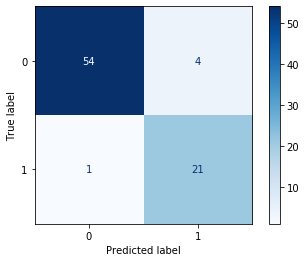

In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
print(cm)
print(acc)
plot_confusion_matrix(classifier,x_test,y_test,cmap=plt.cm.Blues)
plt.show()


In [9]:
from matplotlib.colors import ListedColormap
# inverse transforming the x_test values and creating the copy of the x_test & y_test as x_set & y_set
x_set , y_set = sc.inverse_transform(x_test), y_test
# creating a meshgrid array from the age column(o) and the estimated salary column(1) as x1 & x2 after increasing the range
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-10,stop =x_set[:,0].max()+10,step = 1),
                   np.arange(start = x_set[:,1].min()-1000,stop =x_set[:,1].max()+1000,step = 1))
# transforming the new data i.e. x1 and x2 after applying sc.transform on it
new_scaled = sc.transform(np.array([x1.ravel(),x2.ravel()]).T)
# prediciting the new_transformed values
new_scaled_prediction = classifier.predict(new_scaled)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


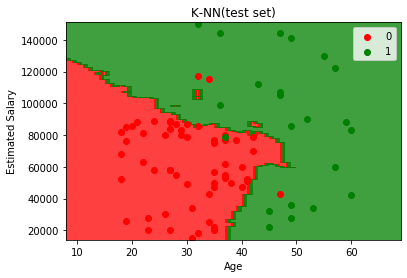

In [10]:
plt.contourf(x1,x2,new_scaled_prediction.reshape(x1.shape),alpha = 0.75,cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('K-NN(test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
